In [2]:
import matplotlib.pyplot as plt
from utils import make_nice_plots
import json
import sys 
sys.path.append("/net/vdesk/data2/pouw/MRP/mockdata_analysis")
from darksirenpop.mock_event_maker import MockEvent
from priors import *

make_nice_plots()

In [2]:
with open("jsons/hyperparam_agn.json", "r") as file:
    hyperparam_dict_agn = json.load(file)
with open("jsons/hyperparam_alt.json", "r") as file:
    hyperparam_dict_alt = json.load(file)

model_dict = {
            'agn': ['PrimaryMass-gaussian'], 
            'alt': ['PrimaryMass-gaussian']
        }


In [9]:
agn_model = PrimaryMass_gaussian(mu_g=25)
alt_model = PrimaryMass_gaussian(mu_g=30)

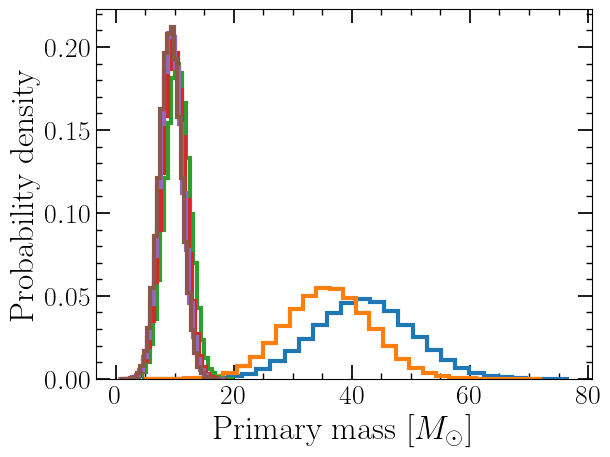

In [4]:
nagn_events = 2
nalt_events = 2 * nagn_events
agn_events_true = agn_model.sample(nagn_events)[0]
alt_events_true = alt_model.sample(nalt_events)[0]

# Lucas from the future to Lucas in the past: is this right?
agn_events_obs = agn_model.sample(nagn_events)[0]
alt_events_obs = alt_model.sample(nalt_events)[0]

agn_events_posteriors = np.random.normal(loc=agn_events_obs[:,np.newaxis], 
                                         scale=0.2 * agn_events_obs[:,np.newaxis], 
                                         size=(nagn_events, int(1e5)))
alt_events_posteriors = np.random.normal(loc=alt_events_obs[:,np.newaxis], 
                                         scale=0.2 * alt_events_obs[:,np.newaxis], 
                                         size=(nalt_events, int(1e5)))

plt.figure()
for post in agn_events_posteriors:
    plt.hist(post, density=True, histtype='step', linewidth=3, bins=30)
for post in alt_events_posteriors:
    plt.hist(post, density=True, histtype='step', linewidth=3, bins=30)
plt.xlabel('Primary mass [$M_{\odot}$]')
plt.ylabel('Probability density')
plt.show()


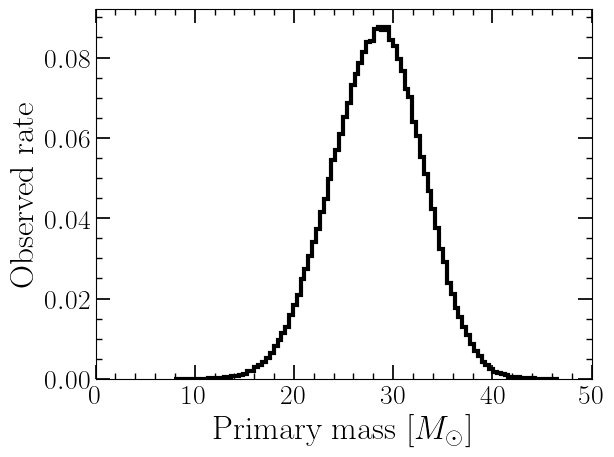

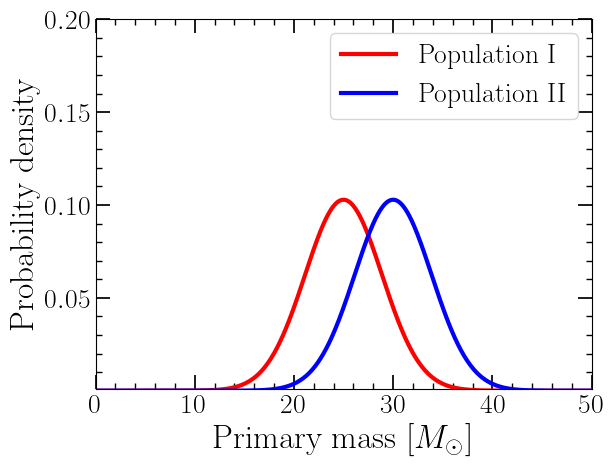

In [10]:
xmax = 50
xx = np.linspace(0, xmax, 1000)

nagn_events = int(1e5)
nalt_events = 2 * nagn_events
agn_events_true = agn_model.sample(nagn_events)[0]
alt_events_true = alt_model.sample(nalt_events)[0]

plt.figure()
plt.hist(np.append(agn_events_true, alt_events_true), histtype='step', density=True, bins=100, color='black', linewidth=3)
# plt.plot(xx, (agn_model.joint_prob(xx) + 2*alt_model.joint_prob(xx)) / 3, color='black', linewidth=3)
plt.xlabel('Primary mass [$M_{\odot}$]')
plt.ylabel('Observed rate')
# plt.legend()
plt.xlim(0, xmax)
# plt.ylim(0, 0.15)
# plt.semilogy()
plt.show()


plt.figure()
# plt.plot(xx, agn_model.joint_prob(xx) + alt_model.joint_prob(xx), color='black', linewidth=3, label='Total')
plt.plot(xx, agn_model.joint_prob(xx), color='red', linewidth=3, label='Population I')
plt.plot(xx, alt_model.joint_prob(xx), color='blue', linewidth=3, label='Population II')
plt.xlabel('Primary mass [$M_{\odot}$]')
plt.ylabel('Probability density')
plt.legend()
plt.xlim(0, xmax)
plt.ylim(1e-3, 0.2)
# plt.semilogy()
plt.show()


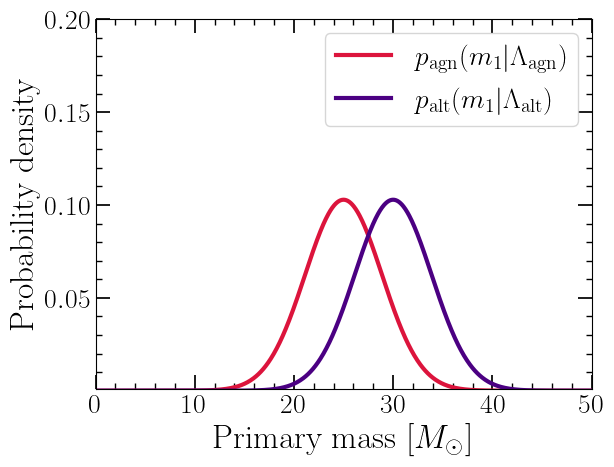

In [ ]:
agn_model = PrimaryMass_gaussian(mu_g=25)
alt_model = PrimaryMass_gaussian(mu_g=30)

# agn_model = PrimaryMass_gaussian()
# alt_model = PrimaryMass_powerlaw_gaussian()

xmax = 50
xx = np.linspace(0, xmax, 1000)

plt.figure()
# plt.plot(xx, agn_model.joint_prob(xx) + alt_model.joint_prob(xx), color='black', linewidth=3, label='Total')
plt.plot(xx, agn_model.joint_prob(xx), color='crimson', linewidth=3, label=r'$p_{\rm agn}(m_{1}|\Lambda_{\rm agn})$')
plt.plot(xx, alt_model.joint_prob(xx), color='indigo', linewidth=3, label=r'$p_{\rm alt}(m_{1}|\Lambda_{\rm alt})$')
plt.xlabel(r'Primary mass [$M_{\odot}$]')
plt.ylabel('Probability density')
plt.legend()
plt.xlim(0, xmax)
plt.ylim(1e-3, 0.2)
# plt.semilogy()
# plt.savefig('masspop_2.pdf', bbox_inches='tight')
plt.show()
